### 1. 라이브러리 호출

In [2]:
# 라이브러리 호출

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('../file/train_add_category.csv')
df = df.drop(['Unnamed: 0','predicted'], axis=1)
df

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,category
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63,dog
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42,cat
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28,cat
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15,dog
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72,cat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15,dog
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70,cat
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20,cat
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20,dog


### 2. split Data

In [4]:
data = df.drop('Pawpularity', axis=1)
target = df['Pawpularity']

data['category'].replace('dog',0, inplace=True)
data['category'].replace('cat',1, inplace=True)
data.drop('Id', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.25, random_state=0)

### 3. fit LightBGM Regressor

In [11]:
from lightgbm import LGBMRegressor

lgbm_wrapper = LGBMRegressor(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train,y_train, early_stopping_rounds=100, eval_metric = 'merror',
                eval_set=evals, 
                verbose=True #함수 수행시 발생하는 상세한 정보들을 표준 출력으로 자세히 내보낼 것인가
                )
preds = lgbm_wrapper.predict(X_test)

[1]	valid_0's l2: 422.888
[2]	valid_0's l2: 422.997
[3]	valid_0's l2: 423.254
[4]	valid_0's l2: 423.381
[5]	valid_0's l2: 423.747
[6]	valid_0's l2: 424.084
[7]	valid_0's l2: 424.432
[8]	valid_0's l2: 424.572
[9]	valid_0's l2: 424.749
[10]	valid_0's l2: 424.984
[11]	valid_0's l2: 425.323
[12]	valid_0's l2: 425.637
[13]	valid_0's l2: 426.01
[14]	valid_0's l2: 426.139
[15]	valid_0's l2: 426.443
[16]	valid_0's l2: 426.748
[17]	valid_0's l2: 426.922
[18]	valid_0's l2: 427.037
[19]	valid_0's l2: 427.139
[20]	valid_0's l2: 427.266
[21]	valid_0's l2: 427.415
[22]	valid_0's l2: 427.586
[23]	valid_0's l2: 427.671
[24]	valid_0's l2: 427.805
[25]	valid_0's l2: 428.012
[26]	valid_0's l2: 428.152
[27]	valid_0's l2: 428.198
[28]	valid_0's l2: 428.348
[29]	valid_0's l2: 428.391
[30]	valid_0's l2: 428.355
[31]	valid_0's l2: 428.401
[32]	valid_0's l2: 428.587
[33]	valid_0's l2: 428.739
[34]	valid_0's l2: 428.855
[35]	valid_0's l2: 428.924
[36]	valid_0's l2: 429.155
[37]	valid_0's l2: 429.323
[38]	valid_

In [12]:
from sklearn.metrics import mean_squared_error

print('수행 결과 값')
print(preds)

RMSE = mean_squared_error(y_test, preds)**0.5
print(f"predict accuracy : {RMSE}")

수행 결과 값
[37.90650786 38.44828552 37.90650786 ... 37.93924376 38.00497222
 37.35193704]
predict accuracy : 20.564243566155668


### 4. visualization

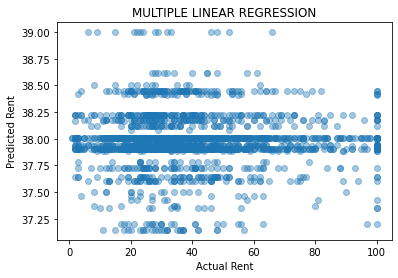

In [13]:
import matplotlib.pyplot as plt

plt.scatter(y_test, preds, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()